<a href="https://colab.research.google.com/github/ayush-jangir1/Machine-Learning/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Temp-Data.csv', index_col = 'DATE', parse_dates=True)
df.index_freq = 'd'
df.dropna(inplace=True)
# df
df = pd.DataFrame(df['Temp'])


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training Splitting

In [5]:
# Dividing data into training and testing so we take last 14 days as test set
train = df.iloc[:510,0]
test = df.iloc[510:,0]


In [6]:
Decomp_results = seasonal_decompose(df)
# Decomp_results.plot()

Now we will find p, d and q using ACF and PACF

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(train, lags=50)
# plot_pacf(train, lags=50)

Now we will find p, d and q using grid search

In [11]:
from pmdarima import auto_arima

auto_arima(df, trace = True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
A_model = ARIMA(train, order=(1,1,2))
predictor = A_model.fit()
predictor.summary()

predicted_result = predictor.predict(start = len(train), end = len(train)+len(test)-1, type = 'levels')
predicted_result

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=1.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=1.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=2.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=2.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=2.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=1.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
2021-05-25,15.552138
2021-05-26,16.149253
2021-05-27,16.342371
2021-05-28,16.404829
2021-05-29,16.425028
2021-05-30,16.431561
2021-05-31,16.433674
2021-06-01,16.434358
2021-06-02,16.434579
2021-06-03,16.434650


This is to install the pmdarima package in this instance else this will show a error

In [10]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


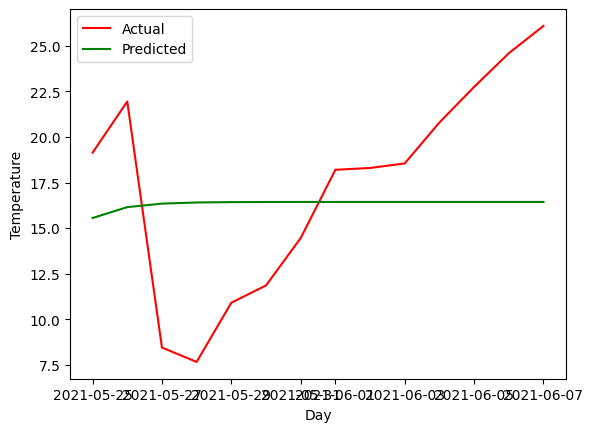

In [12]:
plt.plot(test, label = 'Actual', color = 'Red')
plt.plot(predicted_result, label = 'Predicted', color = 'Green')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [13]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(test, predicted_result))
rmse

5.801290354498276